In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
data = {
    'Outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast',
                'Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Mild',
                    'Cool','Mild','Mild','Mild','Hot','Cool','Mild'],
    'Humidity': ['High','High','High','High','Normal','Normal','Normal',
                 'High','Normal','Normal','Normal','High','Normal','High'],
    'Wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong',
             'Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'PlayTennis': ['No','No','Yes','Yes','Yes','No','Yes',
                   'No','Yes','Yes','Yes','Yes','Yes','No']
}

In [3]:
df = pd.DataFrame(data)
print("Original data (first 5 rows):")
print(df.head(), "\n")


Original data (first 5 rows):
    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes 



In [4]:
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [5]:
print("Label mapping for 'PlayTennis':")
for cls_index, cls_label in enumerate(encoders['PlayTennis'].classes_):
    print(f"  {cls_index} -> {cls_label}")
print()

Label mapping for 'PlayTennis':
  0 -> No
  1 -> Yes



In [6]:
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

model_full = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

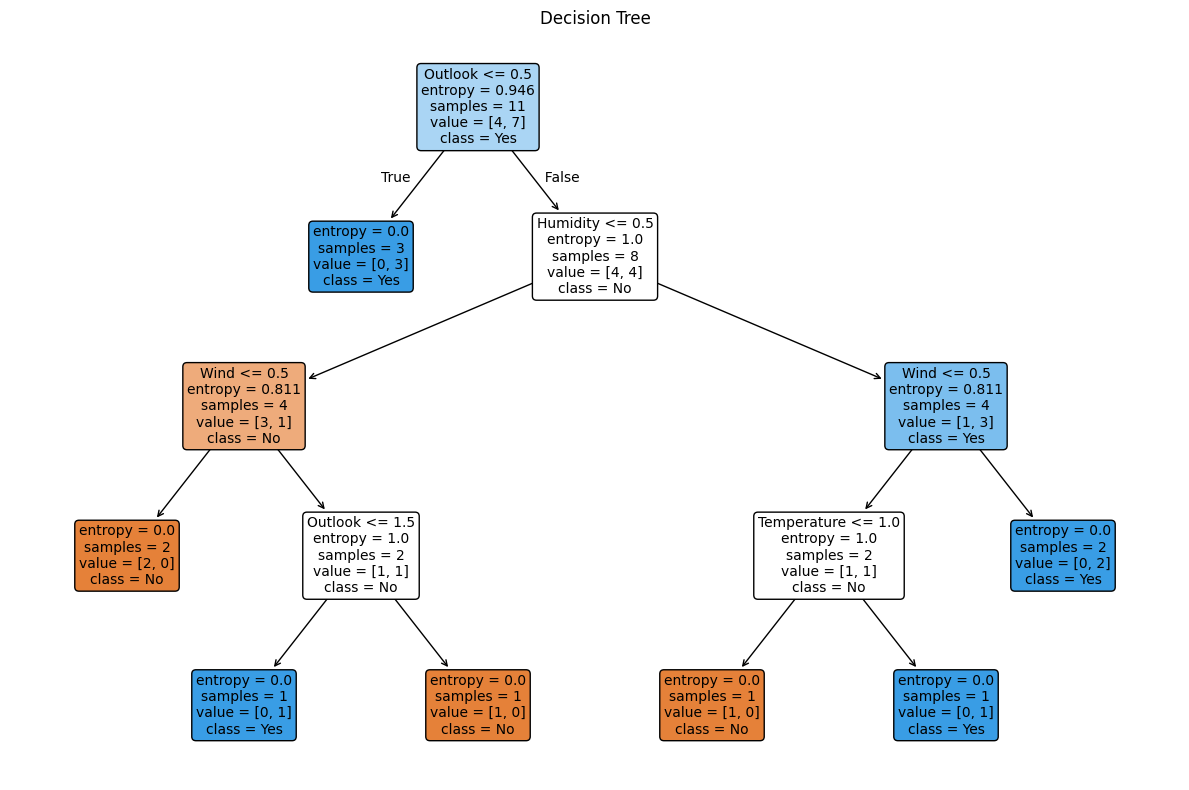

In [9]:
plt.figure(figsize=(12,8))

plot_tree(
    model_full,
    feature_names=X.columns,
    class_names=[str(c) for c in encoders['PlayTennis'].classes_],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree")
plt.tight_layout()
plt.show()
